# Tutorial: K Nearest Neighbor Algorithm and Application

This tutorial will introduce an algorithm called K Nearest Neighbor algorithm(KNN). We will explain the logic of why this algorithm works and details of implementation. And then we will demostrate this algorithm with applying it on a real world dataset. We will also discuss the technique to tune the parameters, and pros and cons of KNN.

## Table of Contents
- Introduction
- How does KNN work?
- Implement KNN from scratch
- How to select K？
- KNN on real data
- Pros and Cons of KNN
- References

## Introduction

K Nearest Neighbor(KNN) belongs to supervised learning, which means that each object in the training set is labeled when we feed it into the algorithm. The simplest classification algorithm is to record every training sample and its label, and when we find a new sample is the same as one of the training samples, we can classify the new sample based on the similarity. However, we can't guarantee that all of the test data will find an exact same match in training data. There might be another problem that test data can be matched with many training examples and classified as many lables. KNN is a simple, but very effective classification algorithm. When it comes to predict a new test data, the algorithm would search through all of the training data and find k most similar examples, which are k-nearest-neighbors. The algorithm will summarize all of the labels associated with k nearest neighbors. The most frequent label would be the label for the new data. KNN has been successful in a large number of classification problems, including handwritten digits and satellite image scenes.

## How does KNN work?

KNN is based on how similar is the new data point to the sample data. The similarity is measured by the distance. For different types of data, we can adopt different ways to calculate distance. For real-valued data, we can use Euclidean distance:$$d(x,y)=\sqrt{\sum\limits_{k=1}^n (x_{k}-y_{k})^2}$$ When the direct distance doesn't make sense, we can also use Manhatten distance: $$d(x,y)=\sqrt{\sum\limits_{k=1}^n |x_{k}-y_{k}|}$$ For categorical or binary data, Hamming distance can be used.

The usual steps of KNN are as following:
1. Calculate the distance between new data point and every training example
2. Sort the distances in ascending order
3. Select k training examples with most smallest distance
4. Summarize the frequency of k labels
5. Return the most prevalent label as predicted label of new data

KNN algorithm is a non-parametric, because it does not make any explicit assumptions on the underlying data distribution. It belongs to instance-based learning since KNN does not essentially learn a model, however, it relies on the data instances to make predictions. KNN memorizes all of the training examples as part of the model. KNN is a competitive learning algorithm, because it internally uses competition between model elements (data instances distances) in order to make a predictive decision. Moreover, KNN is lazy learnig algorithm because it doesn't build a model unless a new data point requested a prediction.

## Implement KNN from scratch
In this section, it will show how to build a simple KNN algorithm in Python 3.4.
Firstly, we start with creating a basic dataset with data points and labels.

In [9]:
from numpy import *  
import operator  
  
def createDataSet():  
    group = array([[1.0,2.0],[1.2,0.1],[0.1,1.4],[0.3,3.5]])  
    labels = ['A','A','B','B']  
    return group,labels

group,labels = createDataSet()
print(dataset)
print(labels)

[[ 1.   2. ]
 [ 1.2  0.1]
 [ 0.1  1.4]
 [ 0.3  3.5]]
['A', 'A', 'B', 'B']


The classify function would implement steps mentioned above and classify the input, which is new data point, based on the data and labels.

In [30]:
def classify(input, group, label, k):
    size = group.shape[0]
    
    #Calculate Euclidean distance
    diff = tile(input,(size,1)) - group
    sqdiff = diff ** 2
    squareDist = sum(sqdiff,axis = 1)
    dist = squareDist ** 0.5
    print("The distances are " + str(dist))
    
    #Sort the distance in ascending order
    sortedDistIndex = argsort(dist)
    
    classCount={}
    for i in range(k):
        #Select k training examples with most smallest distance
        voteLabel = label[sortedDistIndex[i]]
        print("The voted label is " + voteLabel)
        #Summarize the frequency of k labels
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
        print("The current frequency for label " + voteLabel + " is " + str(classCount[voteLabel]))
    
    #Return the most prevalent label as predicted label of new data
    maxCount = 0
    for key,value in classCount.items():
        if value > maxCount:
            maxCount = value
            pred = key

    return pred  

We can pass a new data point into the classify function to see which label it will get.

In [31]:
input = array([1.1,0.3])
k = 3
result = classify(input,group,labels,k)
print("The predicted label is " + result)

The distances are [ 1.70293864  0.2236068   1.48660687  3.2984845 ]
The voted label is A
The current frequency for label A is 1
The voted label is B
The current frequency for label B is 1
The voted label is A
The current frequency for label A is 2
The predicted label is A


As you can see, the algorithm correctly classifed the input data point as label A. 
We can also use existing libraries like sklearn to implement KNN.

In [77]:
from sklearn.neighbors import NearestNeighbors  
import numpy as np  
  
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])  

#auto is to select the most appropriate method to find nearest neighbors
nn = NearestNeighbors(n_neighbors=3, algorithm="auto").fit(X)

#distances is representing the lengths to points
#indices is indices of the nearest points in the population matrix
distances, indices = nn.kneighbors(X)  
print(indices)
print(distances) 

[[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 4 5]
 [4 3 5]
 [5 4 3]]
[[ 0.          1.          2.23606798]
 [ 0.          1.          1.41421356]
 [ 0.          1.41421356  2.23606798]
 [ 0.          1.          2.23606798]
 [ 0.          1.          1.41421356]
 [ 0.          1.41421356  2.23606798]]


Data tree-based structures are more advanced methods to search for similar instances. It's faster than usual KNN classifier. These two tree-structure algorithm produce the same results here. When they are applied on large dataset, the difference will be more obvious.

In [39]:
#KDTree
from sklearn.neighbors import KDTree  
import numpy as np  
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])  
kdt = KDTree(X,leaf_size=30,metric="euclidean")
print(kdt.query(X, k=3, return_distance=False))
  

[[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 4 5]
 [4 3 5]
 [5 4 3]]


In [40]:
#BallTree  
from sklearn.neighbors import BallTree  
import numpy as np  
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])  
bt = BallTree(X,leaf_size=30,metric="euclidean")  
print(bt.query(X, k=3, return_distance=False))

[[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 4 5]
 [4 3 5]
 [5 4 3]]


KNN actually can also be applied for resolution of a regression problem. We can use a random data set to see how it works.

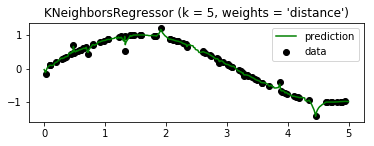

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::10] += 1 * (0.5 - np.random.rand(10))

# Fit regression model
n_neighbors = 5

knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_ = knn.fit(X, y).predict(T)

plt.subplot(2, 1, i + 1)
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()

## How to select K?
At this point, you might want to ask that how to choose k. How does k impact your classifier?

An alternate way of understanding KNN is by thinking about it as calculating a decision boundary (i.e. boundaries for more than 2 classes) which is then used to classify new points. It is often successful where each class
has many possible prototypes, and the decision boundary is very irregular.

The decision boundary of 1-Nearest Neighbor on three-class simulated data looks like:
![1-Nearest Neighbor](1NN.jpg)
If we use 15-Nearest Neighbor, it looks like:
![15-Nearest Neighbor](15NN.jpg) The broken purple curve in the image is Bayes decision boundary. (Source: Hastie et al. The Elements of Statistical Learning)

As we can see, the decision boundary of 15-Nearest Neighbor classifer is fairly smooth compared to where a 1-nearest neighbor classifier was used. There is a close relationship between nearest neighbor and prototype methods: in 1-nearest-neighbor classification, each training point is a prototype.

When K is small, we are restraining the region of a given prediction and forcing our classifier to be “more blind” to the overall distribution. In 1-nearest neighbor, it uses only the training point closest to the new data point, the bias of the 1-nearest-neighbor estimate is often low, but the variance is high. Graphically, our decision boundary will be more jagged. On the other hand, a higher K averages more voted labels in each prediction and hence is more resilient to outliers. Larger values of K will have smoother decision boundaries but also comes with lower variance and increased bias. (Reference: A Complete Guide to K-Nearest-Neighbors with Applications in Python and R)

## KNN on real data
This section will demonstrate KNN with applying KNN classifier on breast cancer dataset from UC Irvine Machine Learning Repository. After downloading the dataset, we have to do prescreening on the dataset including filling the empty data points, and removing irrelevant data. Using sklearn package, it's simple and quick to implement KNN classifier.

In [33]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace = True)
df.drop(['id'], 1, inplace = True)
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [36]:
#Split training set and test set
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
#Implement KNN
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
#Calculate accuracy
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.978571428571


The accuracy is about 0.98, which is pretty impressive. 

To explore which k can produce the lowest misclassification error, we can use cross validation to determine the k.

The optimal number of neighbors is 5


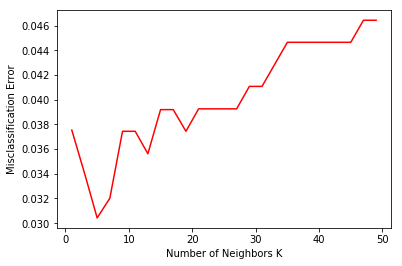

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = []
for x in myList:
    if x % 2 != 0:
        neighbors.append(x)

cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = []
for x in cv_scores:
    MSE.append(1 - x)

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE, c='r')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

To see how KNN performs compared with other classification methods, we can see it from comparison with logistic regression.

In [68]:
from sklearn import linear_model

kNNbrs = KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % kNNbrs.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f' % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.978571
LogisticRegression score: 0.957143


KNN actually outperforms logistic regression on this breast cancer data set. KNN is a really simple and effective classifier.

## Pros and Cons of KNN
### Pros
- KNN is very simple and easy to interpret and implement. It can complete training steps with zero to little training time.
- KNN doesn't make any assumptions for training data because most of the data in practice does not obey the typical theoretical assumptions made. This could be very useful for non-linear data.
- KNN can be used for not only classification, but also regression.
- KNN is insensitive to outliers, so it's an advantage compared with other algorithms that might be impacted by noise or irrelavant data.
- KNN is suitable for various types of data, including numerical, discrete, multiclass data, without putting in much effort to hardcode the algorithm for one type of data setting.

### Cons
- KNN is a computationally expensive algorithm because it has to store all of the training examples, which also increases storage cost.
- KNN belongs to lazy learning algorithm. Compared with other eager learning algorithm, KNN is slower.
- KNN can suffer from skewed class distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example。
- KNN cannot handle high-dimentional data very well, because it's hard to differentiate between the nearest and farthest neighbor. 
- KNN cannot make out-of-sample regression because it's instance-based. The prediction it made won't exceed the maximum and the minimum of training samples.

To summarize this tutorial, the disadvantages of KNN are as obvious as its advantages. However, KNN is sitll one of the simplest classification algorithm and it is one of the most used learning algorithms.

## References
- Hastie et al. The Elements of Statistical Learning, Second Edition
- Breast cancer dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
- Kevin Zakka's blog. A Complete Guide to K-Nearest-Neighbors with Applications in Python and R. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
- Adi Bronshtein blog. A Quick Introduction to K-Nearest Neighbors Algorithm. https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7